[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]
[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


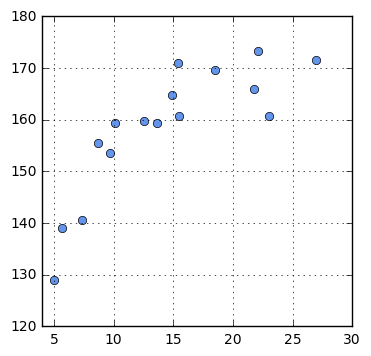

In [28]:
# 年齢 x と身長 t のセットのデータから
# データベースにない人の年齢 x に対して、その人の身長 t を予測

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# データ生成 -------------------------
np.random.seed(seed=1) #乱数を固定
x_min = 4  # x の下限
x_max = 30 # x の上限
x_n = 16 # データの個数
x = 5 + 25 * np.random.rand(x_n) # 5-30歳の間で年齢 x をランダムに生成
Prm_c = [170, 108, 0.2] # 生成パラメータ
t = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * x) \
    + 4 * np.random.randn(x_n) # 108cm-170cmの間で身長 t を生成

# データ確認 -------------------------
print(x)
print(np.round(x, 2)) # 小数点以下2桁で x を表す
print(np.round(t, 2)) # 小数点以下2桁で t を表す

# データグラフ表示 -------------------------
plt.figure(figsize = (4, 4))
plt.plot(x, t, marker='o', linestyle='None', 
         markeredgecolor='black', color='cornflowerblue')
plt.xlim(x_min, x_max)
plt.grid(True)
plt.show()

/Users/Ryuton/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/Ryuton/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


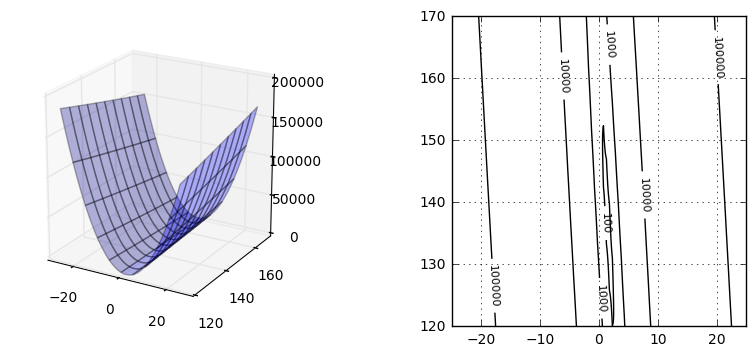

In [31]:
from mpl_toolkits.mplot3d import Axes3D

# 平均誤差関数（Mean Squared Error） ------------------------------
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t)**2)
    return mse 

# 平均二乗誤差 J の計算 --------------------------------------
xn = 100  # 等高線表示の解像度
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn) # x0軸
x1 = np.linspace(w1_range[0], w1_range[1], xn) # x1軸
xx0, xx1 = np.meshgrid(x0, x1) # 等高線描くには meshgrid して contour
J = np.zeros((len(x0), len(x1))) # len(x0)行（x0の長さ分の行）, len(x1)列（x1の長さ分の列）のゼロ行列

# i0 と i1 が xn の範囲で mse に　w0, w1 代入
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(x, t, (x0[i0], x1[i1]))

# 表示 --------------------------------------
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d') # グラフの複数表示 plt.subplot(n1, n2, n) 縦n1,横n2としたときn番目かつ3次元グラフ
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3, 
                color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20]) # x軸の目盛りの数値が重ならないよう必要な数値だけ表示
ax.set_yticks([120, 140, 160]) # y軸の目盛りの数値が重ならないよう必要な数値だけ表示
ax.view_init(20, -60) # 3次元グラフの向き

plt.subplot(1, 2, 2) # グラフの複数表示 縦1横2のときの2番目のグラフ
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=[100, 1000, 10000, 100000]) # 等高線プロットの作成
cont.clabel(fmt='%1.0f', fontsize=8) # 等高線に入れる数値のフォーマット、文字サイズの指定
plt.grid(True)
plt.show()